#Use Random Forest to prepare a model on fraud data 
##treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz 
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt

# 1. Data Collection and description

In [2]:
from google.colab import files
uploaded= files.upload()

Saving Fraud_check.csv to Fraud_check (4).csv


In [3]:
df= pd.read_csv('Fraud_check.csv')

In [4]:
df1= df.copy()

In [5]:
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [7]:
df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
df1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [9]:
df1.shape

(600, 6)

### Outlier Check

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


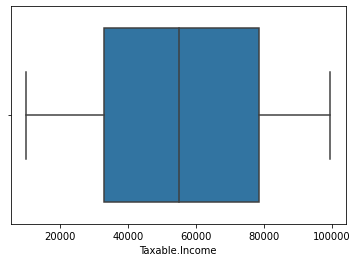

In [10]:
ax= sns.boxplot(df1['Taxable.Income'])

### The data has no outlier instances

In [11]:
plt.rcParams['figure.figsize']= 9,5

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


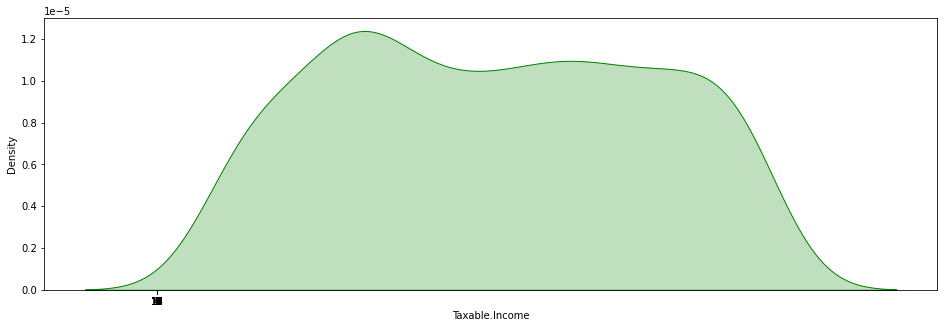

In [12]:
plt.figure(figsize=(16,5))
print('Skew: {}'.format(df1['Taxable.Income'].skew()))
print('Kurtosis: {}'.format(df1['Taxable.Income'].kurtosis()))
ax= sns.kdeplot(df1['Taxable.Income'],shade=True, color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

'''The data is Skewed on the right & has negative Kurtosis'''

In [13]:
obj_colum= df1.select_dtypes(include='object').columns.tolist()

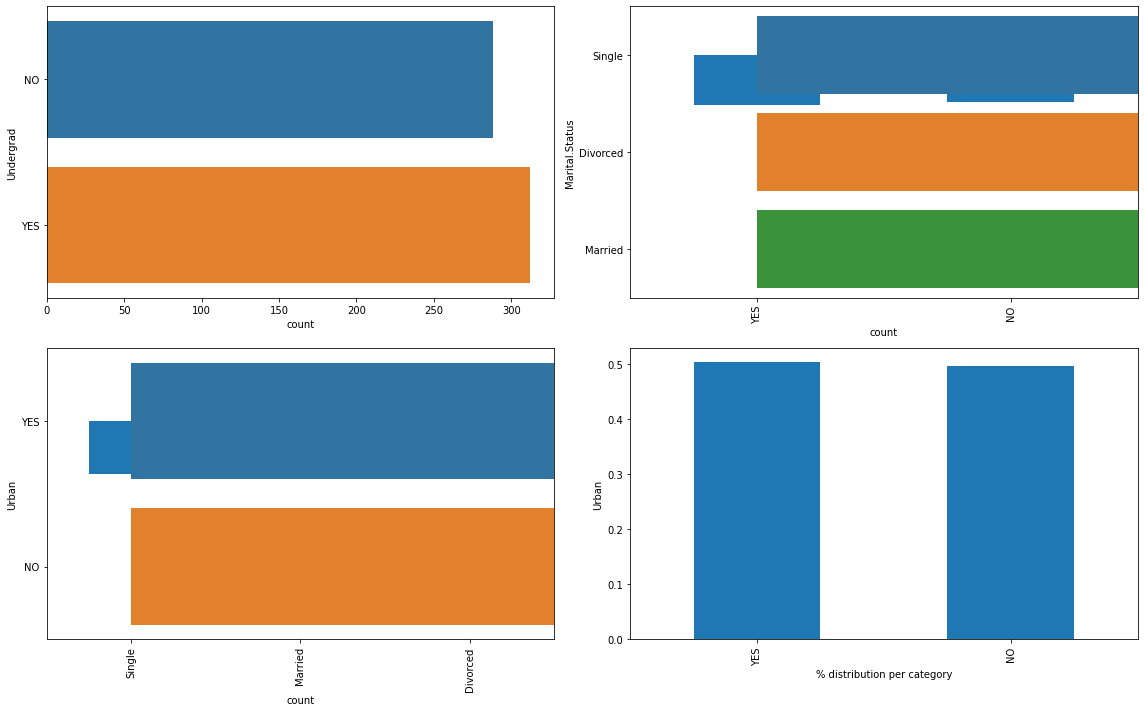

In [14]:
plt.figure(figsize=(16,10))
for i, col in enumerate(obj_colum,1):
  plt.subplot(2,2,i)
  sns.countplot(data=df1, y=col)
  plt.subplot(2,2,i+1)
  df1[col].value_counts(normalize= True).plot.bar()
  plt.ylabel(col)
  plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [15]:
num_columns= df1.select_dtypes(exclude= 'object').columns.tolist()

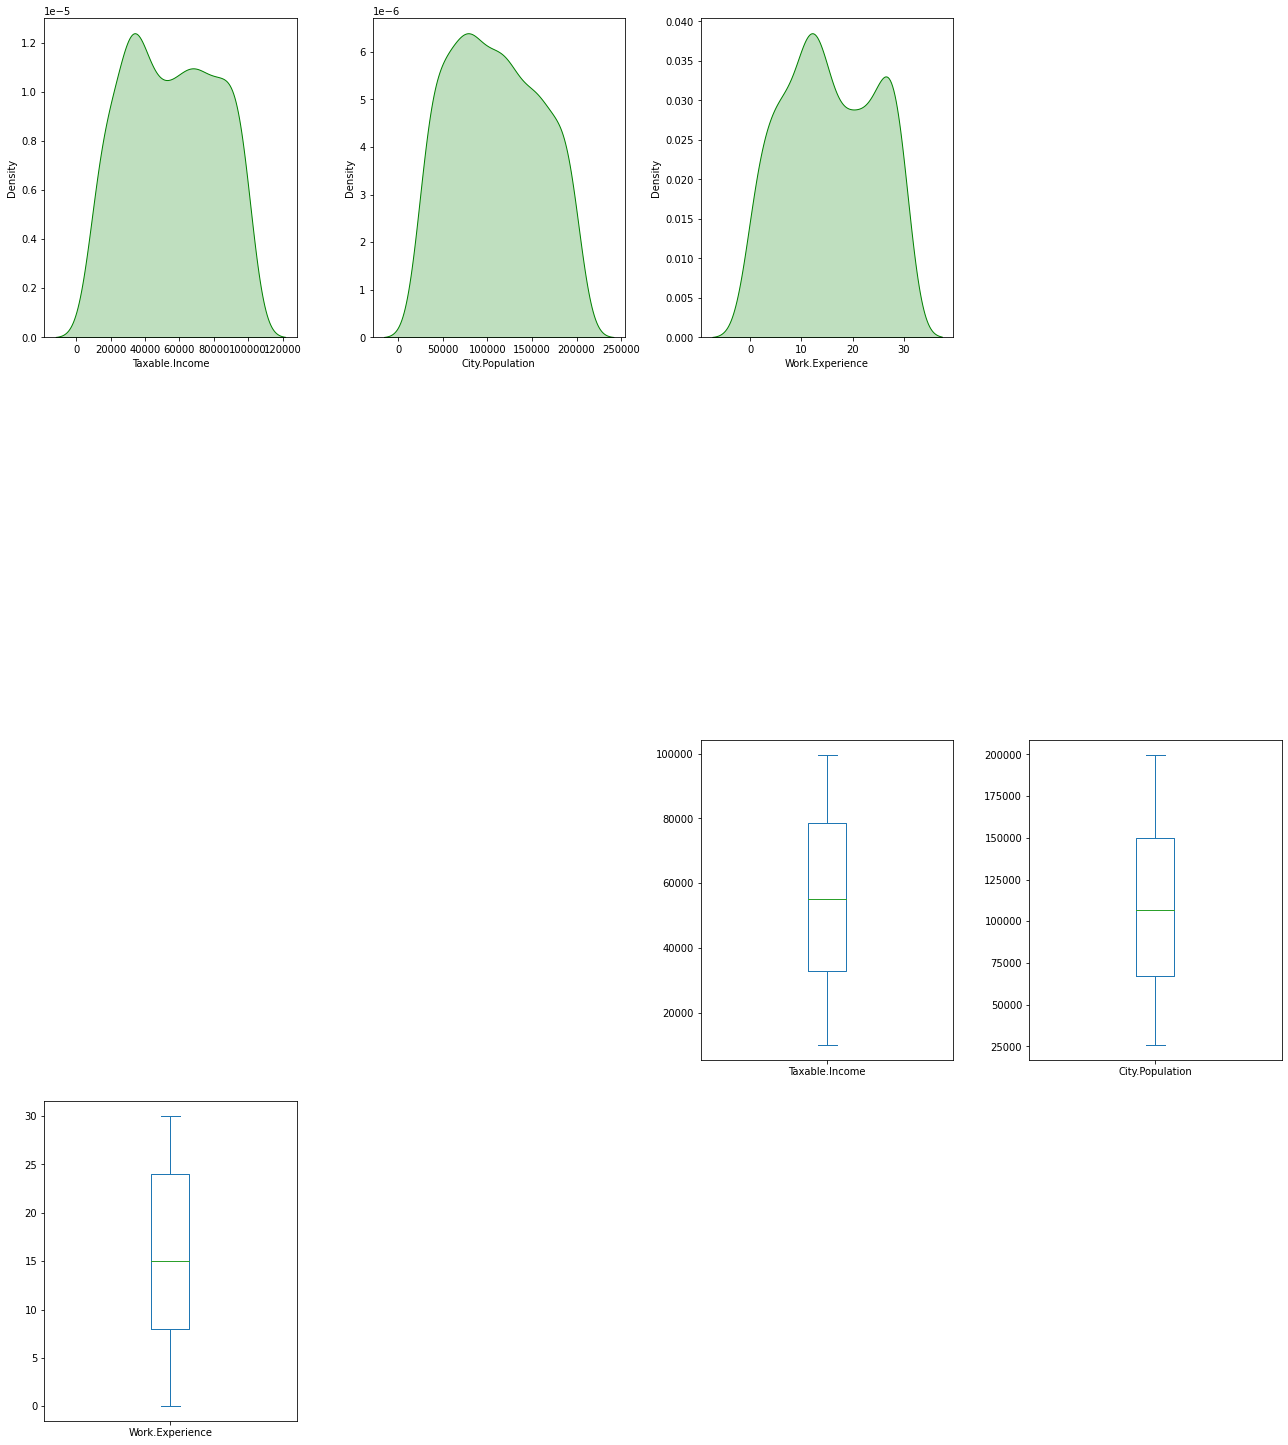

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [16]:
plt.figure(figsize=(18,40))
for i, col in enumerate(num_columns,1):
  plt.subplot(8,4,i)
  sns.kdeplot(df[col], color='g',shade=True)
  plt.subplot(8,4,i+10)
  df[col].plot.box()
plt.tight_layout()
plt.show()
num_data= df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()], index=['skewness', 'kurtosis'])

In [17]:
corr= df1.corr()

In [18]:
df1= pd.get_dummies(df1,columns= ['Undergrad','Marital.Status','Urban'])

In [19]:
corr= df1.corr()

<AxesSubplot:>

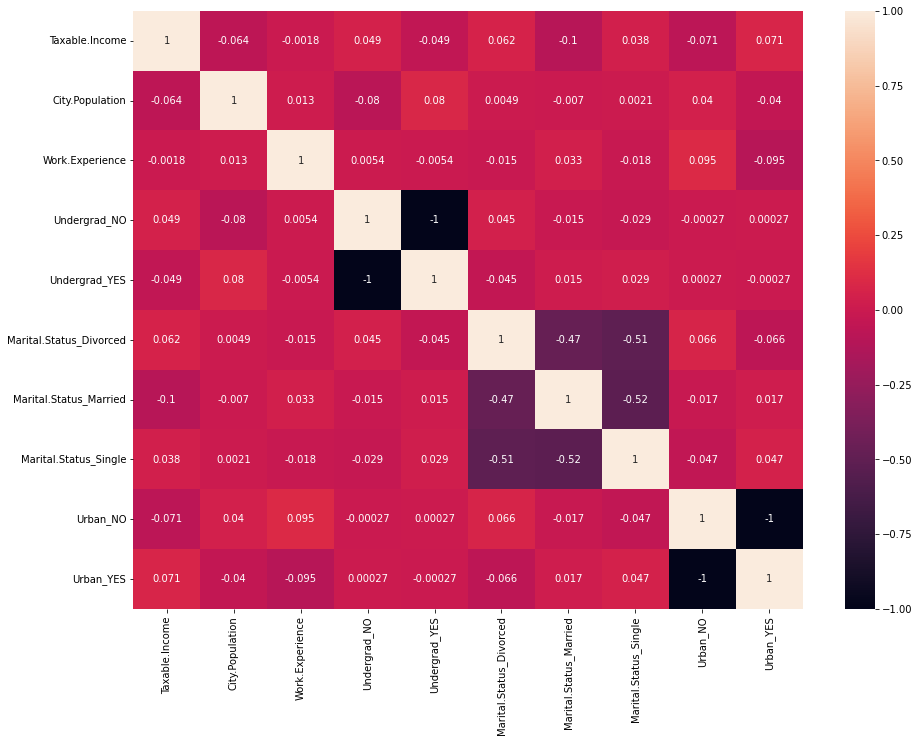

In [20]:
plt.figure(figsize= (15,11))
sns.heatmap(corr, annot= True)

# 2. Random Forest - Model

###Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [21]:

df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [22]:

list(df1.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [23]:
X = df1.iloc[:,1:10]
y = df1.iloc[:,0]

In [24]:
x_train, x_test,y_train, y_test= train_test_split(X,y,test_size= 0.2)

In [39]:
y_train.value_counts()

good     380
risky    100
Name: Taxable.Income, dtype: int64

In [26]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.75

In [27]:
pred_train= model.predict(x_train)

In [28]:
accuracy_score(y_train, pred_train)

1.0

In [37]:
confusion_matrix(y_train, pred_train)

array([[380,   0],
       [  0, 100]])

In [30]:
pred_test= model.predict(x_test)

In [31]:
accuracy_score(y_test, pred_test)

0.7416666666666667

In [32]:
confusion_matrix(y_test, pred_test)

array([[88,  8],
       [23,  1]])

In [33]:
df_t= pd.DataFrame({'Actual' : y_test, 'Predicted': pred_test})

In [34]:
df_t

,Actual,Predicted
481,good,good
70,good,good
65,good,good
308,good,good
103,good,good
...,...,...
48,risky,good
416,good,good
156,good,good
422,good,good


In [35]:
cols= list(df1.columns)

In [45]:
predictors= cols[0:9]
target= cols[0]

In [46]:
tree1 = model.estimators_[20]

In [47]:
dot_data= StringIO()

In [48]:
export_graphviz(tree1, out_file = dot_data, feature_names =predictors, class_names = target, filled =True,rounded=True,impurity =False,proportion=False,precision =2)


In [49]:
graph= pydotplus.graph_from_dot_data(dot_data.getvalue())

# 3- Conclusion
'''Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 74%
As seen in the confusion matrix of Test data 89 instances are predicted correctly and 31 instances are not'''

In [50]:

rf_small = RF(n_estimators=10, max_depth = 3)

In [51]:

rf_small.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [52]:
tree_small = rf_small.estimators_[5]

In [53]:
export_graphviz(tree_small, out_file = dot_data, feature_names = predictors, rounded = True, precision = 1)


In [54]:
graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())


In [56]:
graph.write_png('fraud_small.png')

True

In [57]:
img = mpimg.imread('fraud_small.png') 

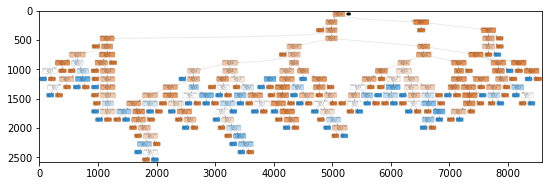

In [58]:
plt.imshow(img)

In [59]:
model.feature_importances_

array([0.52007593, 0.36418281, 0.01452059, 0.01548699, 0.01697704,
       0.01913296, 0.01872269, 0.01568346, 0.01521753])

In [60]:
fi= pd.DataFrame({'feature': list(x_train.columns), 'importance': model.feature_importances_}).sort_values('importance', ascending= False)

In [61]:
fi

,feature,importance
0,City.Population,0.520076
1,Work.Experience,0.364183
5,Marital.Status_Married,0.019133
6,Marital.Status_Single,0.018723
4,Marital.Status_Divorced,0.016977
7,Urban_NO,0.015683
3,Undergrad_YES,0.015487
8,Urban_YES,0.015218
2,Undergrad_NO,0.014521


### As seen in the above table City.Population is most important feature